<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [29]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data['dataset'].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



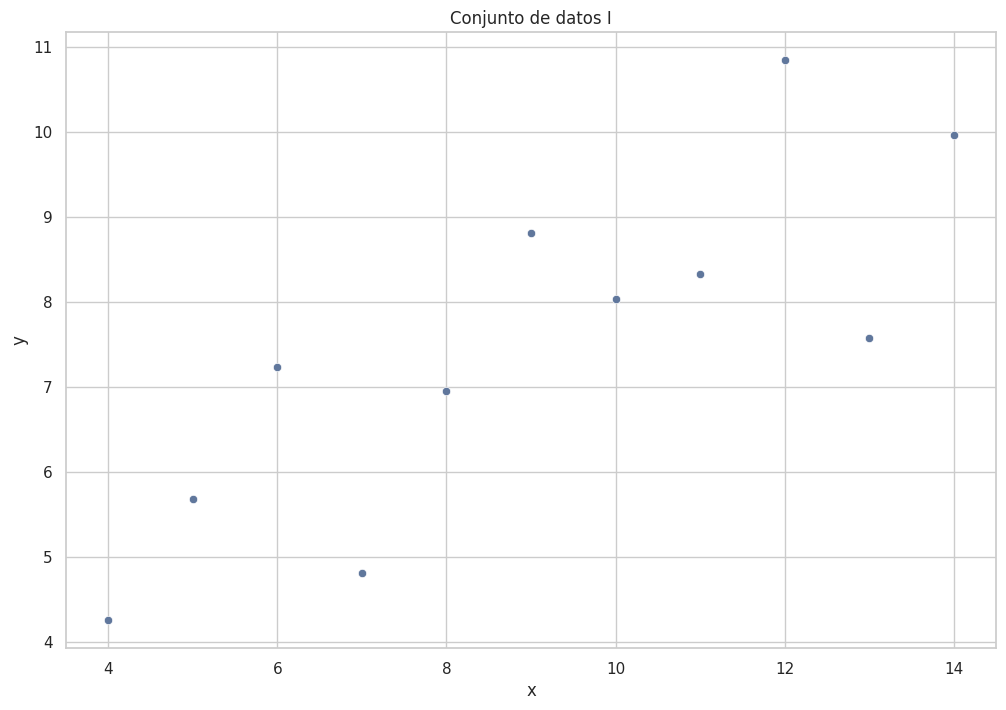

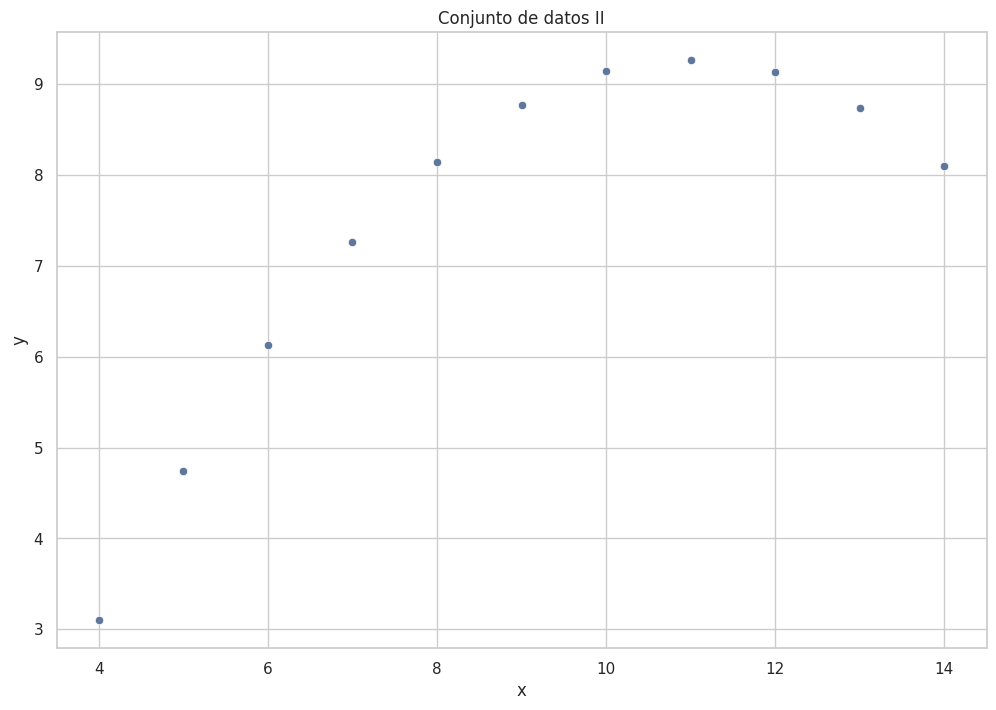

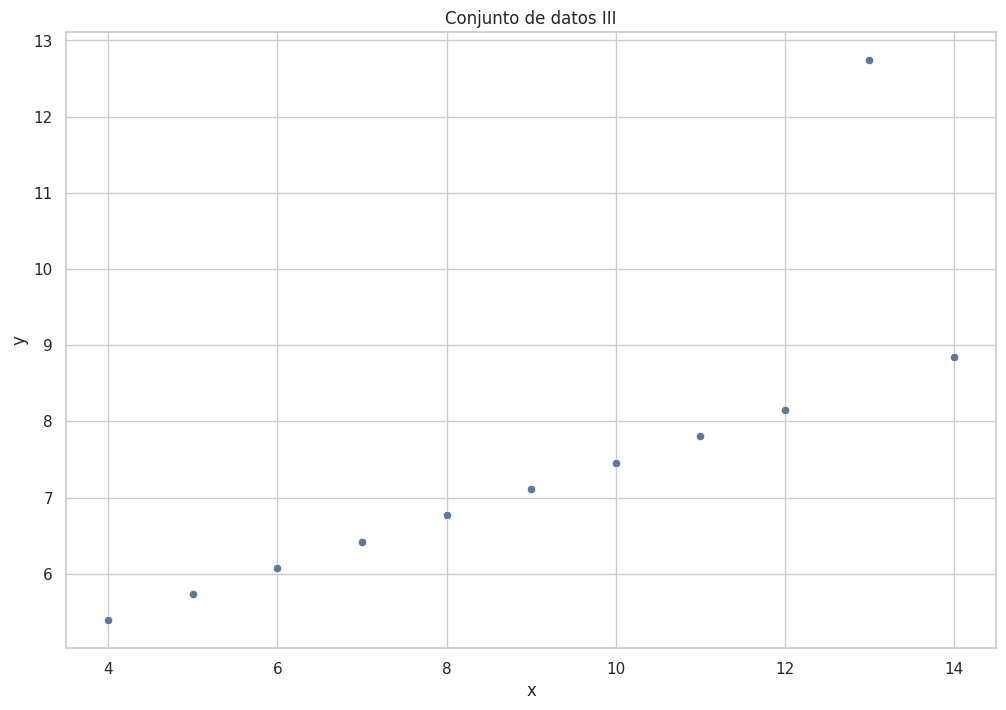

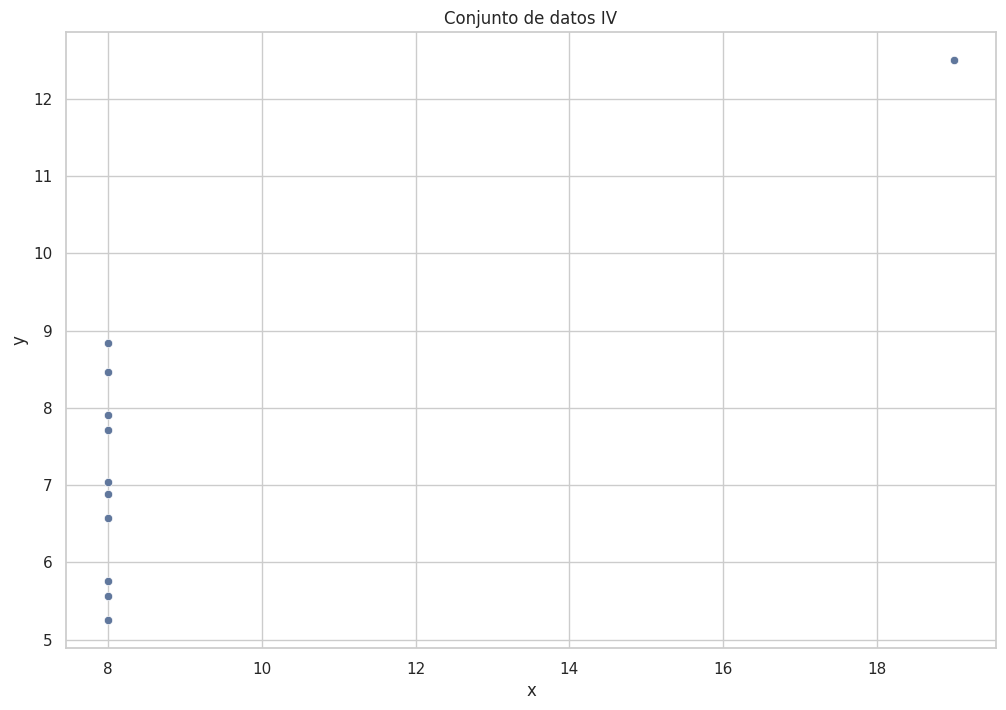

In [21]:
for dataset in data['dataset'].unique():
    dataset_data = data.loc[data['dataset'] == dataset]
    sns.scatterplot(data=dataset_data, x='x', y='y')
    plt.title(f'Conjunto de datos {dataset}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

Desde ya vemos que los 4 graficos representan tendencias distintas, el grafico del dataset II tiene claramente una tendencia distinta al resto. Por otro lado, parece ser que el conjunto 4 de datos esta invertido, es decir, el x es el y y viceversa.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [13]:
for dataset in data['dataset'].unique():
    dataset_data = data.loc[data['dataset'] == dataset]
    print(f"Estadísticas para el conjunto de datos {dataset}:")
    print(dataset_data.describe())
    print("\n")

Estadísticas para el conjunto de datos I:
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000


Estadísticas para el conjunto de datos II:
               x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000


Estadísticas para el conjunto de datos III:
               x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000


Estadísticas para el conjunto de datos IV:
               x          y
count  11.000000  11.000000
mean    9.

Ambos 4 conjuntos de datos comparten el mismo promedio y desviacion estandar muy parecida. Sin mirar los graficos, podria suponerse que se trata del mismo conjunto y que se calcula el promedio y desviacion de subconjuntos

**3**. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



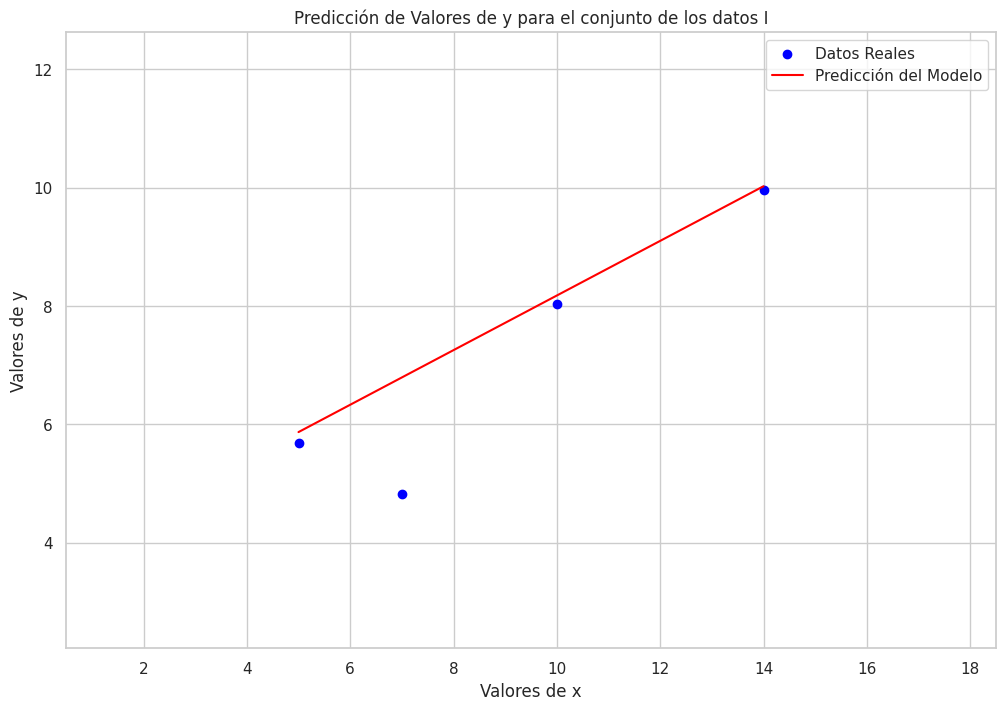

Conjunto de datos I:
MSE del conjunto de datos I: 0.9878036090461578
R^2 del conjunto de datos I: 0.7572293056321078


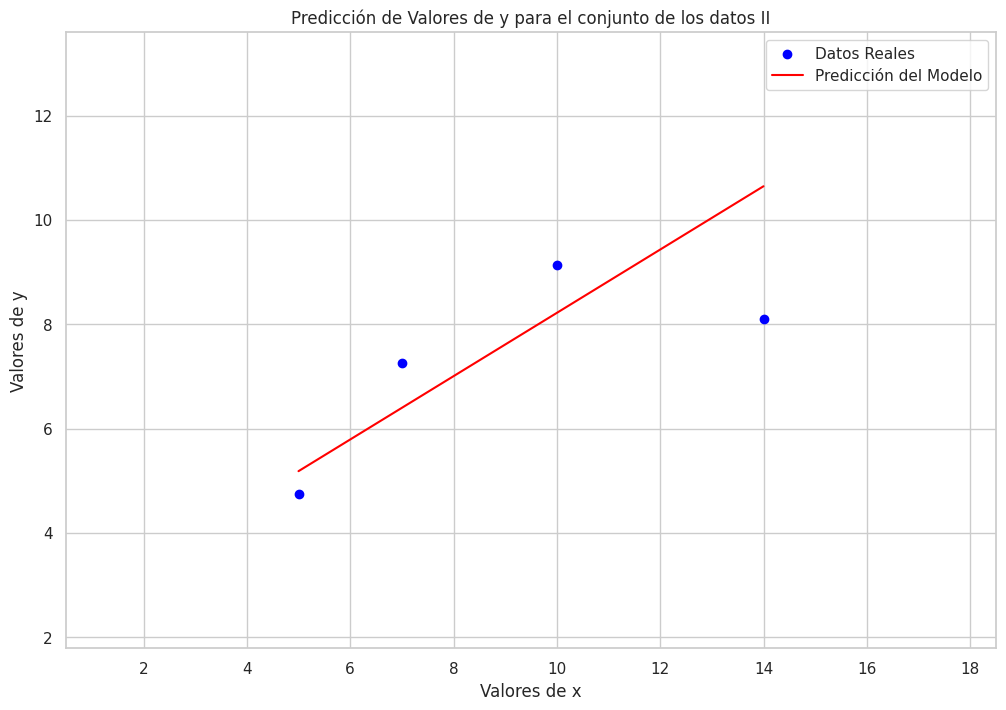

Conjunto de datos II:
MSE del conjunto de datos II: 2.0669685546874996
R^2 del conjunto de datos II: 0.21856695221825284


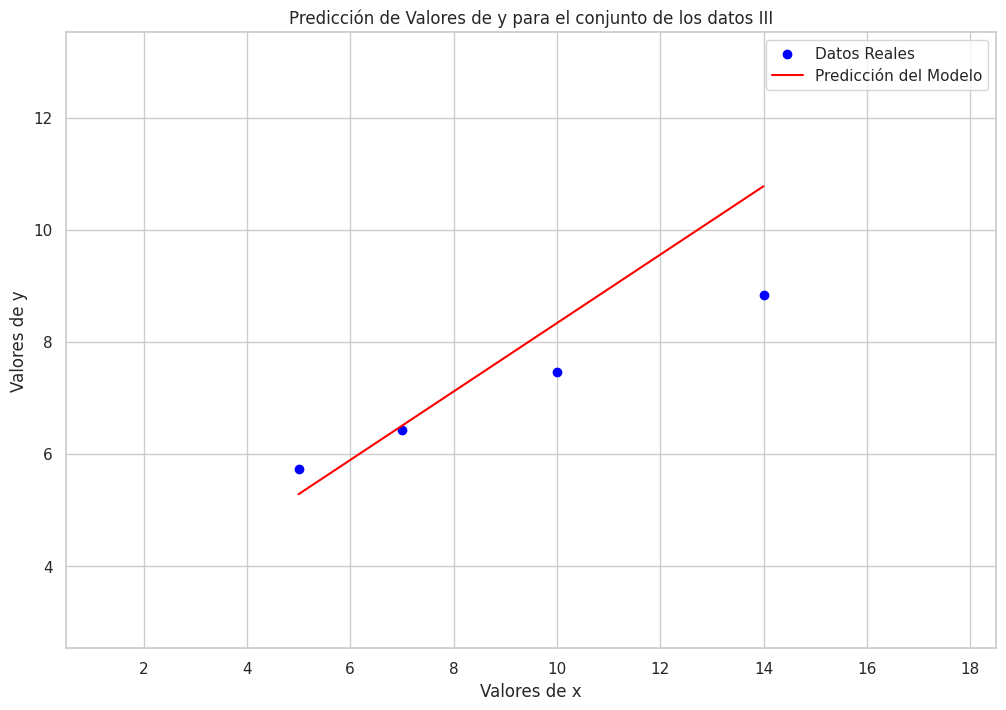

Conjunto de datos III:
MSE del conjunto de datos III: 1.1772652819575085
R^2 del conjunto de datos III: 0.14316444099801484


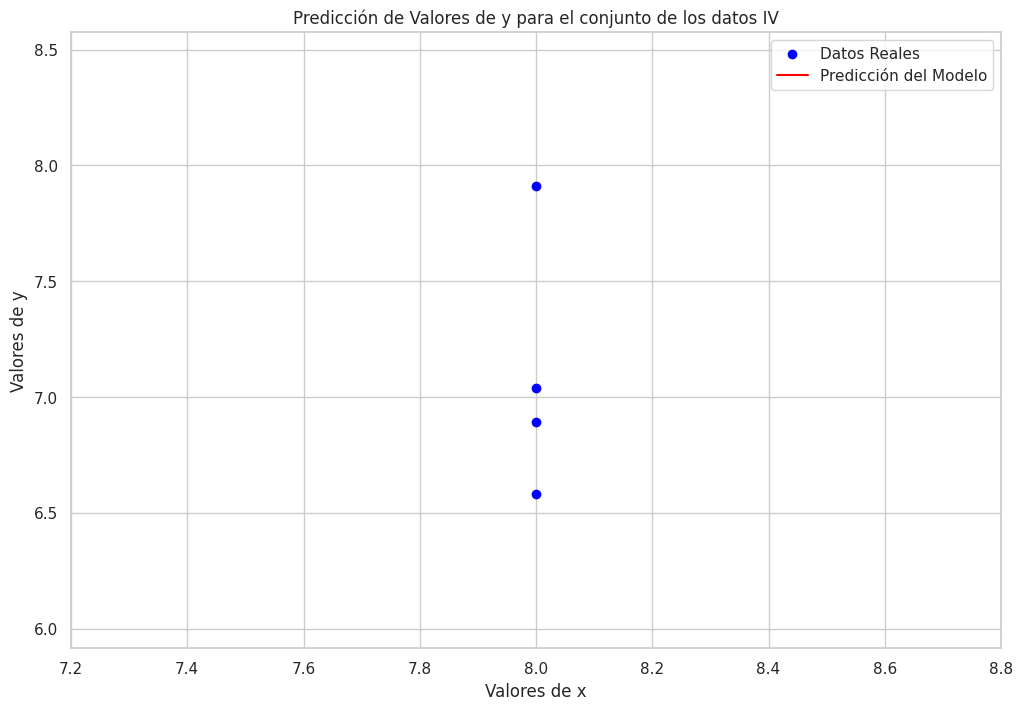

Conjunto de datos IV:
MSE del conjunto de datos IV: 0.2735694444444442
R^2 del conjunto de datos IV: -0.12337314215971307


In [28]:
for dataset in data['dataset'].unique():
  data_set= data.loc[data['dataset'] == dataset]
  X = data_set.drop(['dataset','y'],axis=1) #features
  y = data_set['y'] #target
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
  model = LinearRegression(fit_intercept=True)
  model.fit(x_train, y_train)
  y_predict=model.predict(x_test)
  mse = mean_squared_error(y_test, y_predict)
  r2 = r2_score(y_test, y_predict)
  plt.scatter(x_test, y_test, label='Datos Reales', color='blue')
  plt.plot(x_test, y_predict, label='Predicción del Modelo', color='red')
  plt.xlabel('Valores de x')
  plt.ylabel('Valores de y')
  plt.title(f'Predicción de Valores de y para el conjunto de los datos {dataset}')
  plt.legend()
  plt.margins(x=0.5, y=0.5)
  plt.show()
  print(f"Conjunto de datos {dataset}:")
  print(f"MSE del conjunto de datos {dataset}: {mse}")
  print(f"R^2 del conjunto de datos {dataset}: {r2}")


De lo anterior, el primer conjunto de datos es el mas lineal de los 4, pues, es el que tiene mayor coeficiente r^2, incluso, el resto lo tiene muy bajo. En cuanto al MSE, era de esperarse que el cuarto conjunto de dato lo tenga menor al resto, pues, los datos estan cerca entre ellos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

El primer conjunto de datos, dado lo anterior, es el unico que se ajusta a una regresion lineal.

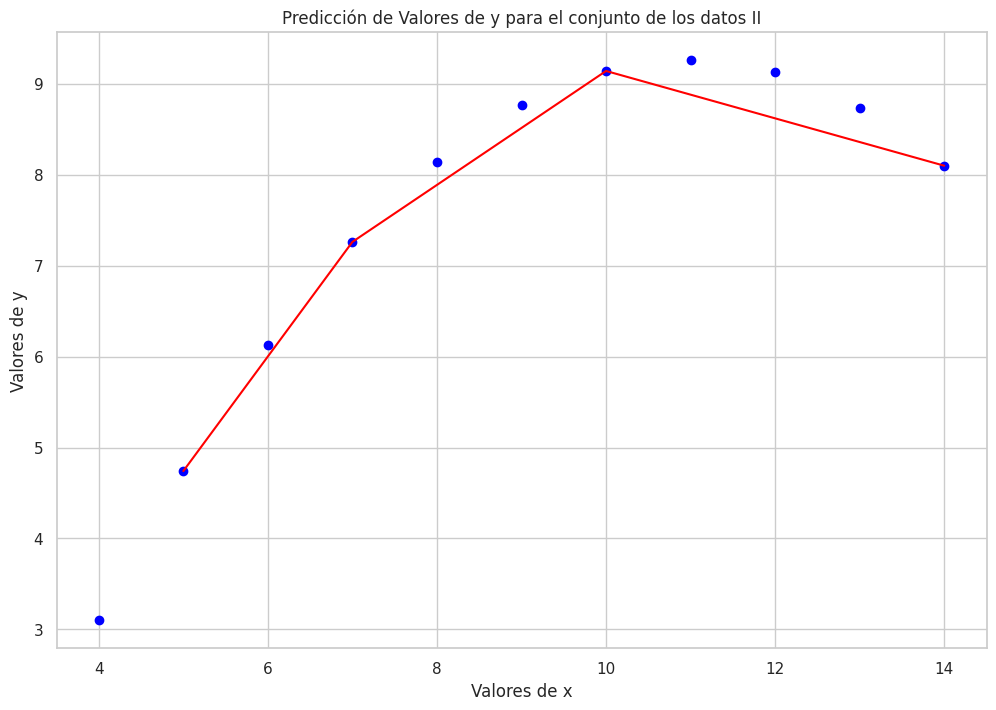

MSE del conjunto de datos II: 2.2379594591785944e-06
R^2 del conjunto de datos II: 0.9999991539225515


In [72]:
#dataset II, ajuste de una cuadratica
dataset_II=data.loc[data['dataset']=='II']
X=dataset_II.drop(['dataset','y'],axis=1)
y=dataset_II['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x_train)
X_poly_test=poly.transform(x_test)
model=LinearRegression()
model.fit(X_poly,y_train)
y_predict=model.predict(X_poly_test)
plt.scatter(X, y, label='Datos Reales', color='blue')
plt.plot(x_test, y_predict, label='Predicción del Modelo', color='red')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title(f'Predicción de Valores de y para el conjunto de los datos II')
plt.show()
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print(f"MSE del conjunto de datos II: {mse}")
print(f"R^2 del conjunto de datos II: {r2}")


Ahora el MSE es mucho menor que si se hacia una regresion lineal

In [71]:
#dataset 3. En este caso la minoria de datos se escapa de la tendencia.
#se eliminaran los datos cuyo valor absoluto sea mayor
data_III=data.loc[data['dataset']=='III']
X=data_III.drop(['dataset','y'],axis=1)
y=data_III['y']
model=LinearRegression()
model.fit(X,y)
y_predict=model.predict(X)
errores=pd.DataFrame({'errores': y-y_predict})
data_III=pd.concat([data_III,errores],axis=1)
umbral= 2*data_III['errores'].std()
data_III_limpio=data_III.loc[abs(data_III['errores'])<umbral]

Ya con los datos sin outliers, procemos a la regresion lineal

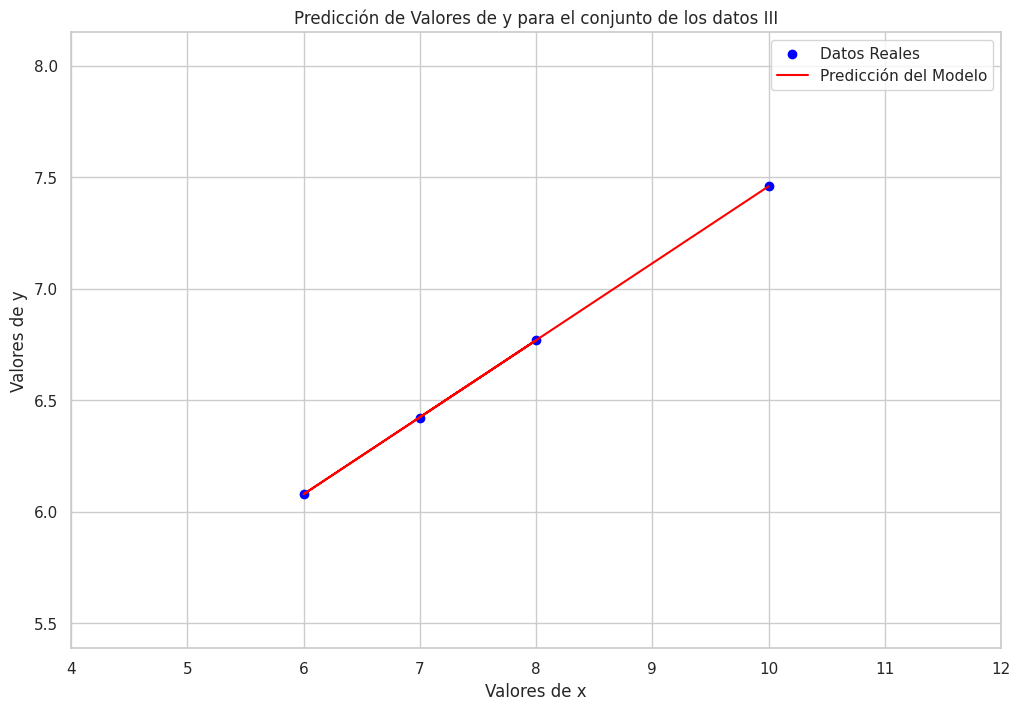

MSE del conjunto de datos III: 4.30766686482153e-06
R^2 del conjunto de datos III: 0.9999834967148344


In [81]:
X=data_III_limpio.drop(['dataset','y','errores'],axis=1)
y=data_III_limpio['y']
model=LinearRegression(fit_intercept=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
plt.scatter(x_test, y_test, label='Datos Reales', color='blue')
plt.plot(x_test, y_predict, label='Predicción del Modelo', color='red')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title(f'Predicción de Valores de y para el conjunto de los datos III')
plt.legend()
plt.margins(x=0.5, y=0.5)
plt.show()
print(f"MSE del conjunto de datos III: {mse}")
print(f"R^2 del conjunto de datos III: {r2}")

Parece ser que si seguia una regresion lineal. Aun asi, parece que es demasiado perfecto. El MSE es bajisimo y R^2 muy cerca de 1

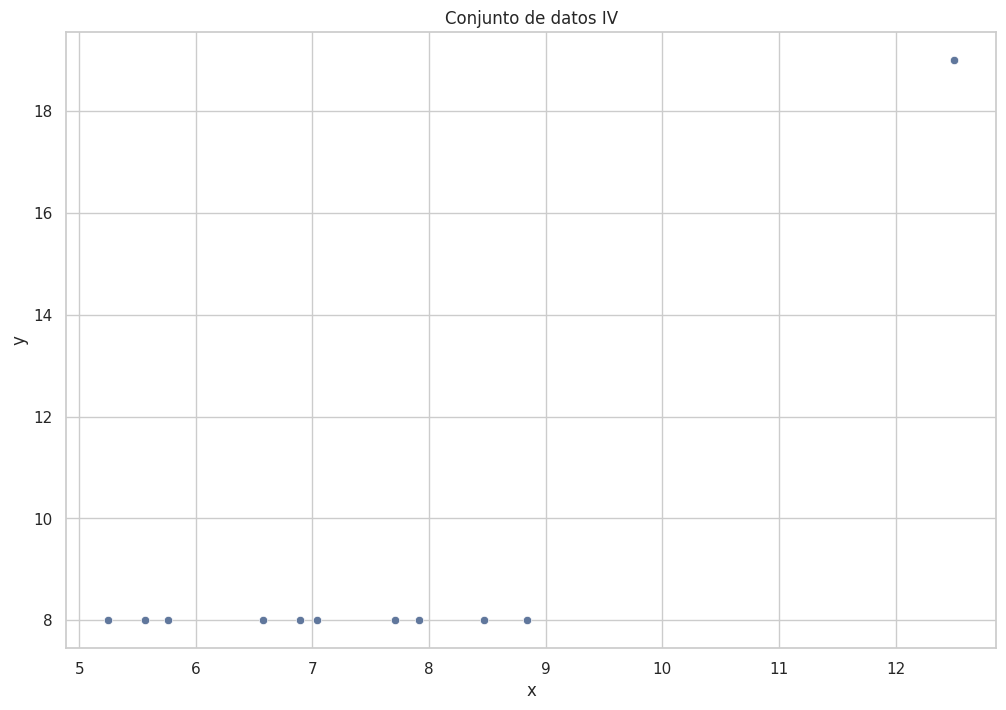

In [92]:
#dataset IV
#invertimos las columnas, pues, del grafico para ser que los datos estan invertidos
data_IV=data.loc[data['dataset']=='IV']
data_IV=data_IV[data_IV.columns[::-1]]
sns.scatterplot(data=dataset_data, x='y', y='x')
plt.title(f'Conjunto de datos IV')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

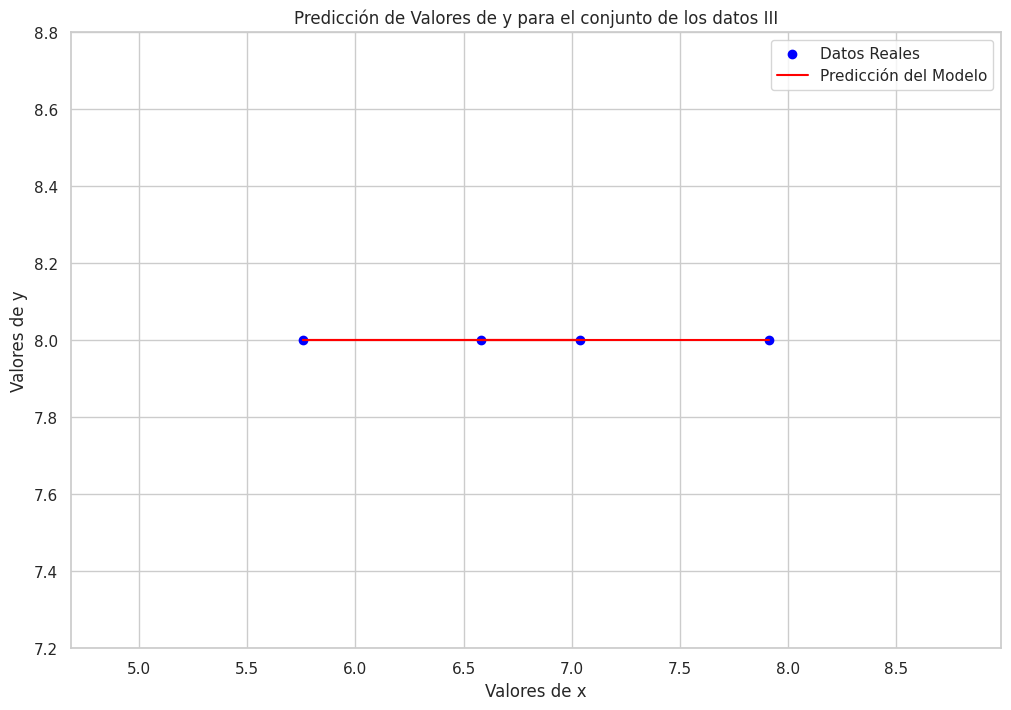

MSE del conjunto de datos III: 0.0
R^2 del conjunto de datos III: 1.0


In [96]:
#modelo regresion lineal
data_IV=data_IV.loc[data_IV['x']<9]
X=data_IV.drop(['dataset','x'],axis=1)
y=data_IV['x']
model=LinearRegression(fit_intercept=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
plt.scatter(x_test, y_test, label='Datos Reales', color='blue')
plt.plot(x_test, y_predict, label='Predicción del Modelo', color='red')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.title(f'Predicción de Valores de y para el conjunto de los datos III')
plt.legend()
plt.margins(x=0.5, y=0.5)
plt.show()
print(f"MSE del conjunto de datos III: {mse}")
print(f"R^2 del conjunto de datos III: {r2}")

Como era de esperarse, segun el primer grafico. Una vez eliminado el outlier y invertidos los ejes se tiene que el conjunto 4 de datos es costante.